In [473]:
import pandas as pd
import numpy as np

energy=pd.read_excel('Energy Indicators.xls')
energy=energy.drop("Unnamed: 0",1)
energy=energy.drop("Unnamed: 1",1)
energy = energy[16:243]

In [474]:
#remove useless rows and change the name of columns
#remove header and footer
#df.dropna()
energy.rename(columns={"Environmental Indicators: Energy":"Country",
                   "Unnamed: 3": "Energy Supply",
                   "Unnamed: 4": "Energy Supply per Capita",
                   "Unnamed: 5": "% Renewable"},inplace=True)
#energy = energy.drop(energy.columns[[0, 1]], axis=1)
#For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.
energy.replace("...", np.nan,inplace = True)

In [475]:
#convert Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule)
energy["Energy Supply"]*=1000000

In [476]:
#There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these,
#e.g.
#'Bolivia (Plurinational State of)' should be 'Bolivia',
#'Switzerland17' should be 'Switzerland'.
#is digt returns true if all characters in the string are digits and there is at least one character, 
#false otherwise.
#find returns the index where "(" appears
def remove_digit(data):
    #this removes the numberscolumns, still not clear how the isdigit work here
    newData = ''.join([i for i in data if not i.isdigit()])
    i = newData.find('(')
    if i>-1: newData = newData[:i]
    return newData.strip()
energy['Country'] = energy['Country'].apply(remove_digit)
energy.replace("Republic of Korea", "South Korea",inplace=True)
energy.replace("United States of America","United States",inplace=True)
energy.replace("United Kingdom of Great Britain and Northern Ireland","United Kingdom",inplace=True)
energy.replace("China, Hong Kong Special Administrative Region","Hong Kong",inplace=True)
energy = energy.set_index('Country')
energy

,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,
Afghanistan,3.210000e+08,10.0,78.669280
Albania,1.020000e+08,35.0,100.000000
Algeria,1.959000e+09,51.0,0.551010
American Samoa,NaN,NaN,0.641026
Andorra,9.000000e+06,121.0,88.695650
Angola,6.420000e+08,27.0,70.909090
Anguilla,2.000000e+06,136.0,0.000000
Antigua and Barbuda,8.000000e+06,84.0,0.000000
Argentina,3.378000e+09,79.0,24.064520


#Next, load the GDP data from the file world_bank.csv, which is a 
csv containing countries' GDP from 1960 to 2015 from World Bank. Call this DataFrame GDP.
Make sure to skip the header, and rename the following list of countries:

In [488]:
GDP=pd.read_csv('world_bank.csv',skiprows=4)
#GDP.replace('Korea, Rep.','South Korea',inplace=True)
#GDP.replace("Iran, Islamic Rep","Iran",inplace=True)
#GDP.replace("Hong Kong SAR, China","Hong Kong",inplace=True)
#GDP.rename(columns={"Country Name": "Country"},inplace=True)
GDP.rename(columns={'Country Name': 'Country'}, inplace=True)
di = {"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"}
GDP.replace({"Country": di},inplace = True)
columns_to_keep = ["Country","2006","2007","2008","2009","2010","2011","2012","2013","2014", "2015"]
GDP = GDP[columns_to_keep]
GDP = GDP.set_index('Country')
GDP

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
Arab World,1.763824e+12,1.863481e+12,1.980983e+12,2.011001e+12,2.103825e+12,2.173896e+12,2.318267e+12,2.385580e+12,2.436659e+12,2.509068e+12
United Arab Emirates,2.789489e+11,2.878318e+11,2.970189e+11,2.814464e+11,2.860493e+11,3.009462e+11,3.216922e+11,3.355937e+11,3.509313e+11,3.621003e+11
Argentina,3.788140e+11,4.089887e+11,4.215649e+11,4.217758e+11,4.616402e+11,5.003555e+11,5.043671e+11,5.189199e+11,5.212737e+11,NaN
Armenia,8.679746e+09,9.873142e+09,1.055439e+10,9.060944e+09,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.111236e+10,1.144574e+10


In [489]:
ScimEn=pd.read_excel("scimagojr-3.xlsx")
ScimEn=ScimEn[0:15]
ScimEn = ScimEn.set_index('Country')
ScimEn

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,127050,126767,597237,411683,4.70,138
United States,2,96661,94747,792274,265436,8.20,230
Japan,3,30504,30287,223024,61554,7.31,134
United Kingdom,4,20944,20357,206091,37874,9.84,139
Russian Federation,5,18534,18301,34266,12422,1.85,57
Canada,6,17899,17620,215003,40930,12.01,149
Germany,7,17027,16831,140566,27426,8.26,126
India,8,15005,14841,128763,37209,8.58,115
France,9,13153,12973,130632,28601,9.93,114


In [490]:
preselection = pd.merge(ScimEn, GDP, how='inner', left_index=True, right_index=True)
#itations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
#df = (df.loc[df['Rank'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])])
#df.sort_values('Rank',inplace=True)
#selection
def answer_one():
    selection=pd.merge(preselection,energy,how='inner', left_index=True, right_index=True)
    return selection
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.271910e+11,93.0,19.754910
United States,2,96661,94747,792274,265436,8.20,230,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,9.083800e+10,286.0,11.570980
Japan,3,30504,30287,223024,61554,7.31,134,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,1.898400e+10,149.0,10.232820
United Kingdom,4,20944,20357,206091,37874,9.84,139,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,7.920000e+09,124.0,10.600470
Russian Federation,5,18534,18301,34266,12422,1.85,57,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,3.070900e+10,214.0,17.288680
Canada,6,17899,17620,215003,40930,12.01,149,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,1.043100e+10,296.0,61.945430
Germany,7,17027,16831,140566,27426,8.26,126,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,1.326100e+10,165.0,17.901530
India,8,15005,14841,128763,37209,8.58,115,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,3.319500e+10,26.0,14.969080
France,9,13153,12973,130632,28601,9.93,114,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,1.059700e+10,166.0,17.020280


In [493]:
preunion = pd.merge(ScimEn, GDP, how='outer', left_index=True, right_index=True)
union=pd.merge(preunion,energy,how='outer', left_index=True, right_index=True)
def answer_two():
    return len(union)-len(selection)
answer_two()
#return len(union)-len(intersect)

291

Question 3 (6.6%)

What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

This function should return a Series named avgGDP with 15 countries and their average GDP sorted in descending order

In [166]:
def answer_three():
    top15=answer_one()
    columns_to_keep = ["2006","2007","2008","2009","2010","2011","2012","2013","2014", "2015"]
    top15 = top15[columns_to_keep]
    #axis=1return the average of the rows, =0 the average of the coluns
    # mean of the specific column
    #df.loc[:,"Score1"].mean()
#    top15.rename("avgGDP")
    avgGDP= top15.mean(axis=1)
    avgGDP.sort_values(ascending=False,inplace=True)
    return avgGDP.rename("avgGDP")
#answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Name: avgGDP, dtype: float64

By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

This function should return a single number.

In [173]:
def answer_four():
    top15=answer_one()
    #new column with the avgGDP
    top15['avgGDP'] = answer_three()
    top15.sort_values(by="avgGDP",ascending=False,inplace=True)
    difference=abs(top15.iloc[5]['2015']-top15.iloc[5]['2006'])
    return difference


246702696075.3999

What is the mean Energy Supply per Capita?

This function should return a single number.

In [492]:
def answer_five():
    top15 = answer_one()
#    columns_ene = ["Energy Supply per Capita"]
#    top15 = top15[columns_ene]
    avg_enpercapita=top15.mean()
    return top15["Energy Supply per Capita"].mean()
answer_five()

157.6

Question 6 (6.6%)

What country has the maximum % Renewable and what is the percentage?

This function should return a tuple with the name of the country and the percentage.

In [250]:
def answer_six():
    Top15 = answer_one()
    maxim=Top15["% Renewable"].idxmax()
    percent=Top15.loc[maxim]["% Renewable"]
    return (maxim,percent)
answer_six()

('Brazil', 69.64803)

Question 7 (6.6%)

Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and what country has the highest ratio?

This function should return a tuple with the name of the country and the ratio.

In [263]:
def answer_seven():
    Top15 = answer_one()
    def ratio(df, w, q):
        return (df[w] / df[q])
    Top15["Citation_ratio"]=ratio(Top15,"Self-citations","Citations")
    country_ratio=Top15["Citation_ratio"].idxmax()
    maxratio=Top15.loc[country_ratio]["Citation_ratio"]
    return(country_ratio,maxratio)
answer_seven()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.271910e+11,93.0,19.754910
United States,2,96661,94747,792274,265436,8.20,230,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,9.083800e+10,286.0,11.570980
Japan,3,30504,30287,223024,61554,7.31,134,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,1.898400e+10,149.0,10.232820
United Kingdom,4,20944,20357,206091,37874,9.84,139,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,7.920000e+09,124.0,10.600470
Russian Federation,5,18534,18301,34266,12422,1.85,57,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,3.070900e+10,214.0,17.288680
Canada,6,17899,17620,215003,40930,12.01,149,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,1.043100e+10,296.0,61.945430
Germany,7,17027,16831,140566,27426,8.26,126,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,1.326100e+10,165.0,17.901530
India,8,15005,14841,128763,37209,8.58,115,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,3.319500e+10,26.0,14.969080
France,9,13153,12973,130632,28601,9.93,114,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,1.059700e+10,166.0,17.020280


Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the third most populous country according to this estimate?

This function should return a single string value.

In [314]:
def answer_eight():
    Top15 = answer_one()
    def ratio(df, w, q):
        return (df[w] / df[q])
    Top15["Population"]=ratio(Top15,"Energy Supply","Energy Supply per Capita")
    Top15.sort_values(by="Population",ascending=False,inplace=True)
    third_pop_country=Top15.iloc[2].name
    return third_pop_country
#answer_eight()


Question 9 (6.6%)

Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the .corr() method, (Pearson's correlation).

This function should return a single number.

(Optional: Use the built-in function plot9() to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)

In [365]:
def answer_nine():
    Top15 = answer_one()
    def ratio(df, w, q):
        return (df[w] / df[q])
    Top15["Population"]=ratio(Top15,"Energy Supply","Energy Supply per Capita")
    Top15["Citations per Capita"]=ratio(Top15,"Citations","Population")
    #return Top15
    return Top15['Citations per Capita'].corr(Top15['Energy Supply per Capita'])
answer_nine()

0.6590661589406329

In [366]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    def ratio(df, w, q):
        return (df[w] / df[q])
    Top15["Population"]=ratio(Top15,"Energy Supply","Energy Supply per Capita")
    Top15["Citations per Capita"]=ratio(Top15,"Citations","Population")
    Top15.plot(x='Citations per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.008])
#plot9()

Question 10 (6.6%)

Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

This function should return a series named HighRenew whose index is the country name sorted in ascending order of rank.

In [378]:
def answer_ten():
    Top15 = answer_one()
    median=Top15["% Renewable"].median(axis=0)
    Top15["HighRenew"]= Top15["% Renewable"]>=median
        #convert bool to 1 and 0's
    Top15["HighRenew"]= Top15["HighRenew"].apply(lambda x:1 if x else 0)
    Top15.sort_values(by="Rank",ascending=True,inplace=True)
    return Top15["HighRenew"]
answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

Question 11 (6.6%)

Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

This function should return a DataFrame with index named Continent ['Asia', 'Australia', 'Europe', 'North America', 'South America'] and columns ['size', 'sum', 'mean', 'std']


In [450]:
def answer_eleven():
    ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}
    Top15 = answer_one()
    def ratio(df, w, q):
        return (df[w] / df[q])
    Top15["Population"]=ratio(Top15,"Energy Supply","Energy Supply per Capita")
#new groped data frame
    groups = pd.DataFrame(columns = ['size', 'sum', 'mean', 'std'])
    #grouped by continentdic
    for group, frame in Top15.groupby(ContinentDict):
    #print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')
    #size =lenght,
        groups.loc[group]=[len(frame),frame["Population"].sum(),frame["Population"].mean(),frame["Population"].std()]
    return groups
#answer_eleven()

,size,sum,mean,std
Asia,4.0,2.821591e+09,7.053977e+08,7.138779e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


Question 12 (6.6%)

Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

This function should return a Series with a MultiIndex of Continent, then the bins for % Renewable. Do not include groups with no countries.


In [465]:
def answer_twelve():
    Top15 = answer_one()
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    Top15 = Top15.reset_index()
    Top15['Continent'] = [ContinentDict[country] for country in Top15['Country']]
    Top15['bins'] = pd.cut(Top15['% Renewable'],5)
    return Top15.groupby(['Continent','bins']).size()
#answer_twelve()

Continent      bins            
Asia           (2.212, 15.753]     3
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

Question 13 (6.6%)

Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

This function should return a Series PopEst whose index is the country name and whose values are the population estimate string.


In [470]:
def answer_thirteen():
    Top15 = answer_one()
    Top15["Population"]=ratio(Top15,"Energy Supply","Energy Supply per Capita")
    return Top15['Population'].apply(lambda x: '{0:,}'.format(x))
#answer_thirteen()

In [471]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


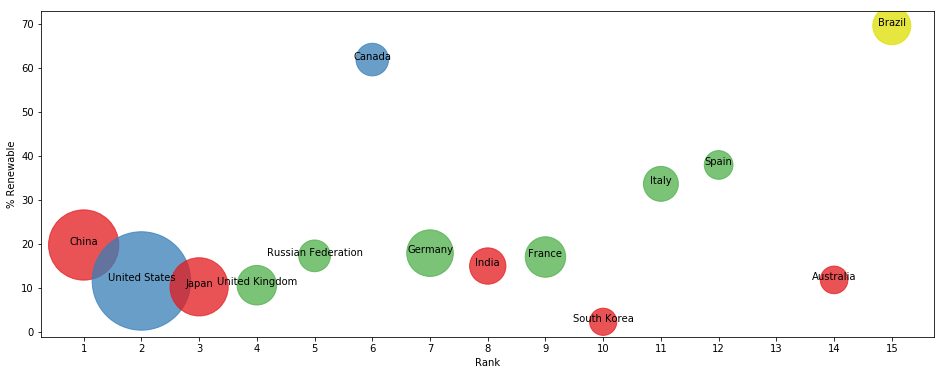

In [472]:
plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!